In [1]:
import numpy as np
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
NUM_WORDS = 10000
NUM_CLASSES = 46

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=NUM_WORDS)

val_data = train_data[:1000]
val_labels = train_labels[:1000]

train_data = train_data[1000:]
train_labels = train_labels[1000:]

def vectorize(seqs, dim=NUM_WORDS):
    ret = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        ret[i, seq] = 1
    return ret

def to_one_hot(labels, num_classes=NUM_CLASSES):
    ret = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        ret[i, label] = 1
    return ret

train_x = vectorize(train_data)
train_y = to_one_hot(train_labels)

val_x = vectorize(val_data)
val_y = to_one_hot(val_labels)

test_x = vectorize(test_data)
test_y = to_one_hot(test_labels)

print("train_x.shape = {}, train_y.shape = {}".format(train_x.shape, train_y.shape))
print("val_x.shape = {}, val_y.shape = {}".format(val_x.shape, val_y.shape))
print("test_x.shape = {}, test_y.shape = {}".format(test_x.shape, test_y.shape))

train_x.shape = (7982, 10000), train_y.shape = (7982, 46)
val_x.shape = (1000, 10000), val_y.shape = (1000, 46)
test_x.shape = (2246, 10000), test_y.shape = (2246, 46)


In [4]:
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(10000, )))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(46, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
model = build_model()
history = model.fit(train_x, train_y, epochs=20, batch_size=512,
                    validation_data=(val_x, val_y), verbose=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [6]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


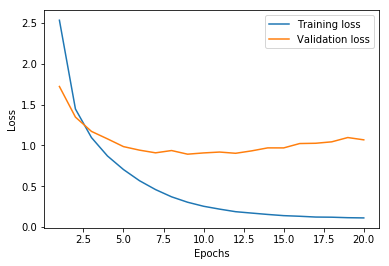

In [7]:
train_loss_history = history_dict['loss']
val_loss_history = history_dict['val_loss']
epochs = range(1, len(train_loss_history) + 1)

plt.figure()
plt.plot(epochs, train_loss_history, label='Training loss')
plt.plot(epochs, val_loss_history, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

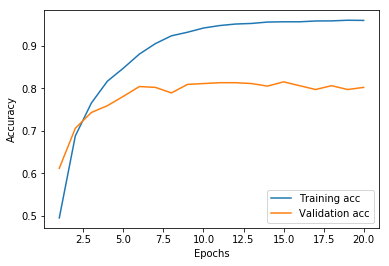

In [8]:
train_acc_history = history_dict['acc']
val_acc_history = history_dict['val_acc']
epochs = range(1, len(train_loss_history) + 1)

plt.figure()
plt.plot(epochs, train_acc_history, label='Training acc')
plt.plot(epochs, val_acc_history, label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [9]:
model = build_model()
history = model.fit(np.concatenate([train_x, val_x]), np.concatenate([train_y, val_y]), 
                    epochs=9, batch_size=512, verbose=0)

In [10]:
sample_idx = 0
sample_data = test_data[sample_idx]
sample_x = test_x[sample_idx]
sample_y = test_y[sample_idx]

dict_word_idx = reuters.get_word_index()
dict_rev_word_idx = {idx: word for word, idx in dict_word_idx.items()}

def decode(data):
    return ' '.join(dict_rev_word_idx.get(i - 3, '?') for i in data)

predict = model.predict(sample_x.reshape(1, -1))

print("data = {}\n".format(decode(sample_data)))
print("label = {}\n".format(np.argmax(sample_y)))
print("predict = {}".format(np.argmax(predict)))

data = ? the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to ? growth and expansion plans for ? inc and ? inc over the next two years a and p said the acquisition of ? in august 1986 and ? in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt ? ? of west germany reuter 3

label = 3

predict = 3
